In [1]:
# Importando o dataset iris para estudo
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True)

# Selecionando apenas as colunas de pétala
X = X.loc[:, ["petal length (cm)", "petal width (cm)"]]

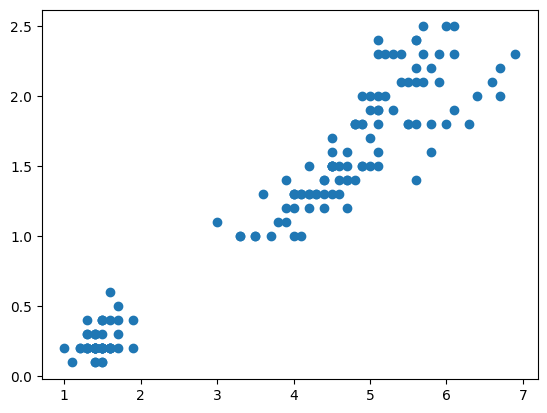

In [2]:
# Visualizando graficamente os pontos
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X["petal length (cm)"], X["petal width (cm)"])
plt.show()

In [47]:
from sklearn.cluster import KMeans
# Utilizando o algoritmo

# Alterando a quantidade de clusters, vai definir a quantidade de labels!
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [48]:
# Verificando labels determinadas no KMeans
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

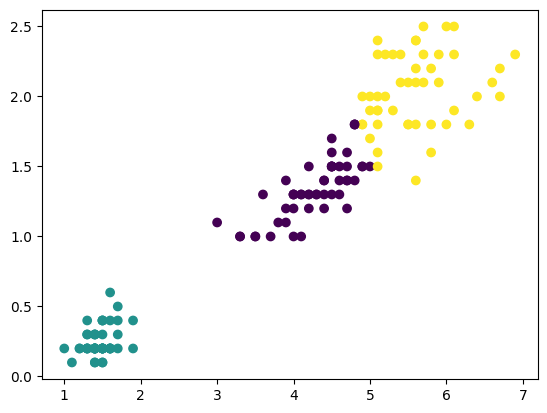

In [49]:
fig, ax = plt.subplots()
                                                          # Definindo a cor pra cada label
ax.scatter(X["petal length (cm)"], X["petal width (cm)"], c=kmeans.labels_)
plt.show()

# Lembrando que isso não é a classificação, ele apenas AGRUPOU e ROTULOU

#### Utilizando o "Método do Cotovelo (Elbow Method)" para determinar o melhor valor de K

In [6]:
valores_k = []
inercias = []
for i in range(1, 15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  valores_k.append(i)
  inercias.append(kmeans.inertia_)

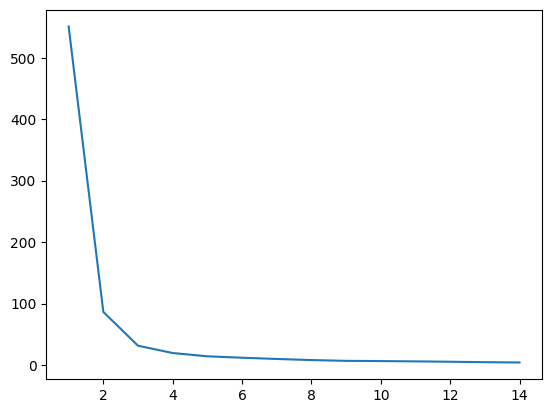

In [7]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercias)
plt.show()

#### Observar os "cotovelos" do gráfico
ou seja, k=2 e k=3

Vamos observar ambos os gráficos dado K

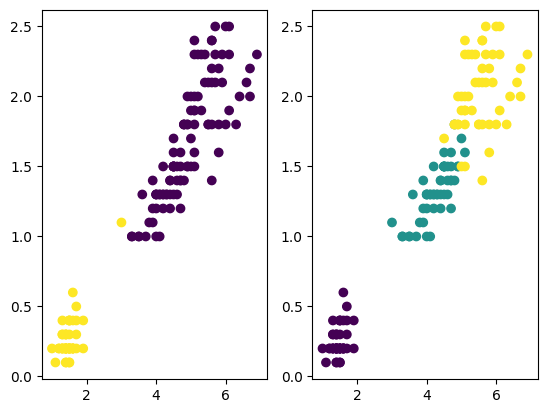

In [8]:
# Vamos visualizar o target e os labels em um mesmo gráfico

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X)
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(X["petal length (cm)"], X["petal width (cm)"], c=kmeans2.labels_)
ax[1].scatter(X["petal length (cm)"], X["petal width (cm)"], c=y)
plt.show()

Vamos agora visualizar se estamos "acertando" as labels

In [9]:
from sklearn import metrics

# para k = 2
metrics.adjusted_rand_score(y, kmeans2.labels_)

0.5583714437541352

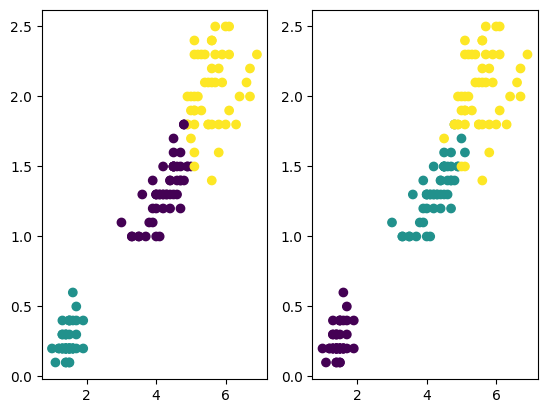

In [10]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(X["petal length (cm)"], X["petal width (cm)"], c=kmeans3.labels_)
ax[1].scatter(X["petal length (cm)"], X["petal width (cm)"], c=y)
plt.show()

In [11]:
# para k=3 (O que faz mais sentido, nesse problem)
metrics.adjusted_rand_score(y, kmeans3.labels_)

0.8856970310281228

E se aumentarmos para k=4 ?

In [12]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X)
metrics.adjusted_rand_score(y, kmeans4.labels_)

0.6799548800041489

A pontuação piora!

In [13]:
valores_k = []
#Adjusted Rand Index
adjust_scores = []
for i in range(1, 15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  valores_k.append(i)
  adjust_scores.append(metrics.adjusted_rand_score(y, kmeans.labels_))

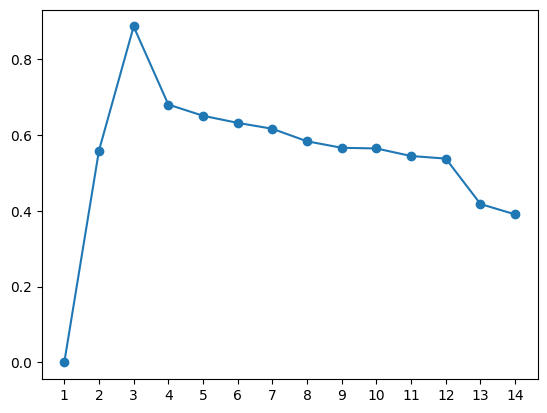

In [14]:
fig, ax = plt.subplots()
ax.plot(valores_k, adjust_scores, marker='o')
ax.set_xticks(valores_k)
plt.show()

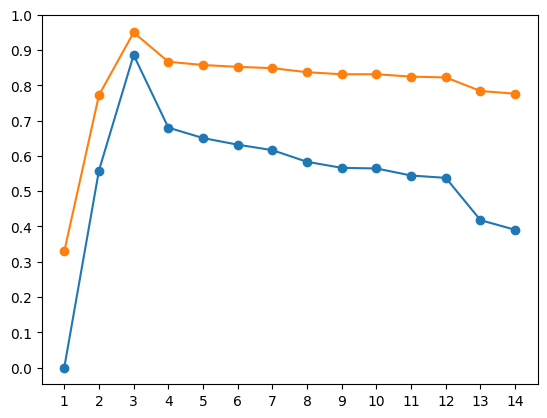

In [15]:
import numpy as np
valores_k = []
#Adjusted Rand Index
adjust_scores = []
rand_scores = [] #(sem o adjuste)
for i in range(1, 15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  valores_k.append(i)
  adjust_scores.append(metrics.adjusted_rand_score(y, kmeans.labels_))
  rand_scores.append(metrics.rand_score(y, kmeans.labels_))


fig, ax = plt.subplots()
ax.plot(valores_k, adjust_scores, marker='o')
ax.plot(valores_k, rand_scores, marker='o')
ax.set_xticks(valores_k)
ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

### Utilizando o Coeficiente de Silhueta

Dita as labels com base na distãncia entre os pontos e a distância entre os clusters

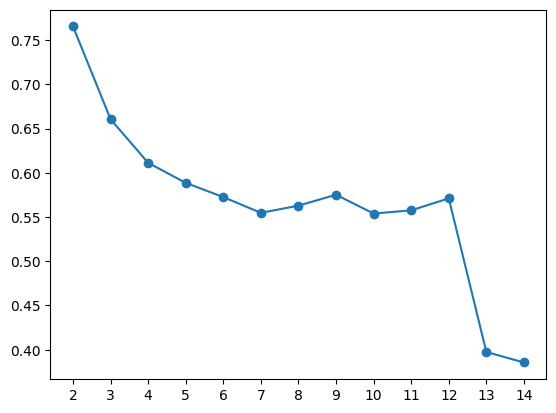

In [16]:
valores_k = []
silhouette_score = []
# O silhouette score não permite k=1
for i in range(2, 15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  valores_k.append(i)
  silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, metric="euclidean"))


fig, ax = plt.subplots()
ax.plot(valores_k, silhouette_score, marker='o')
ax.set_xticks(valores_k)
# ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

Ou seja, através da silhouette score, o melhor K é 2.

Porém, SABEMOS que existem 3 tipos no problema. Ou seja, quando se sabe os rótulos não há necessidade de usar clusterização. 

Quando não sabemos os rótulos, o ideal é usar o silhouette score.

Mas este é o melhor valor de K? NÃO! Tudo depende da regra de negócio.

# Clusterização Hierárquica

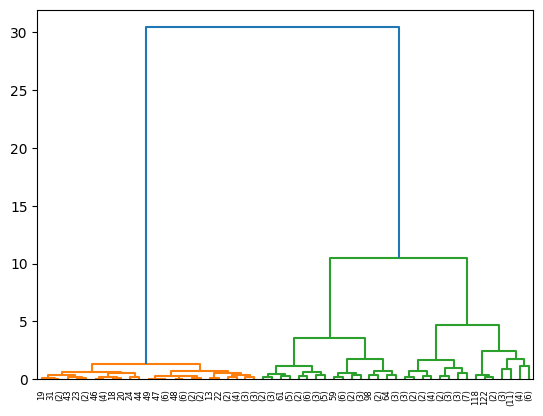

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

# linkage(X)

# P == Level (quantidade de subdivisões)
dendrogram(linkage(X, "ward"), truncate_mode="level", p=5)
plt.show()

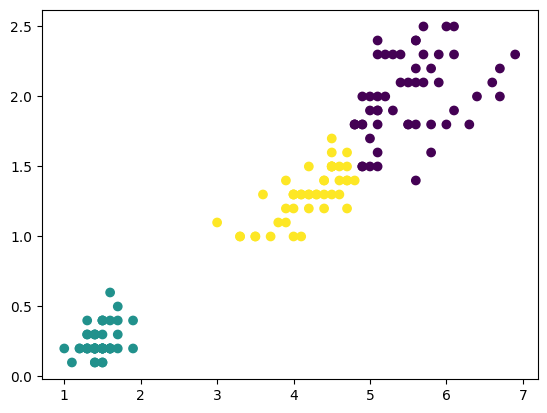

In [46]:
from sklearn.cluster import AgglomerativeClustering
agglo_cluster = AgglomerativeClustering(3, linkage="average")

agglo_cluster.fit(X)
agglo_cluster.labels_

fig, ax = plt.subplots()
ax.scatter(X["petal length (cm)"], X["petal width (cm)"], c=agglo_cluster.labels_)
